In [37]:
#!pip install Jinja2

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
df = pd.read_csv("../../data/preprocessed/luftung_warme_weather.csv",delimiter=',',encoding='UTF-8')

In [40]:
def timestamp_to_datetime(timestamp):
    return datetime.datetime.fromisoformat(timestamp)
    

In [41]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [42]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [43]:
df = df[['timestamp', 'vent_heating','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [44]:
df

,timestamp,vent_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 01:00:00,0.0,13.881370,0.00000,0.00000,0.00000,57.0,1,14,6,2021,1
1,2021-06-14 02:00:00,0.0,12.711369,0.00000,0.00000,0.00000,61.0,1,14,6,2021,2
2,2021-06-14 03:00:00,0.0,11.861369,0.00000,0.00000,0.00000,63.0,1,14,6,2021,3
3,2021-06-14 04:00:00,0.0,11.341370,0.00000,0.00000,0.00000,65.0,1,14,6,2021,4
4,2021-06-14 05:00:00,0.0,11.041369,0.00000,0.00000,0.00000,64.0,1,14,6,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9896,2022-07-31 09:00:00,0.0,21.521370,423.63998,253.54324,170.09674,53.0,0,31,7,2022,9
9897,2022-07-31 10:00:00,0.0,22.621370,569.60000,356.17730,213.42268,50.0,0,31,7,2022,10
9898,2022-07-31 11:00:00,0.0,23.331371,663.94000,435.17670,228.76329,47.0,0,31,7,2022,11
9899,2022-07-31 12:00:00,0.0,24.011370,778.75000,516.47910,262.27090,44.0,0,31,7,2022,12


In [45]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_13873/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,vent_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
vent_heating,1.000000,-0.348626,-0.061271,-0.067669,-0.045846,0.153885,0.272314,-0.018228,0.055375,-0.054893,0.015943
Graz Temperature [2 m elevation corrected],-0.348626,1.000000,0.486730,0.478403,0.471039,-0.432891,-0.191983,0.064742,0.126258,-0.119769,0.180840
Graz Shortwave Radiation,-0.061271,0.486730,1.000000,0.987659,0.959156,-0.604404,-0.063096,0.015094,-0.046394,0.049303,0.218647
Graz Direct Shortwave Radiation,-0.067669,0.478403,0.987659,1.000000,0.903015,-0.594728,-0.063376,0.015538,-0.043054,0.044333,0.201607
Graz Diffuse Shortwave Radiation,-0.045846,0.471039,0.959156,0.903015,1.000000,-0.583722,-0.058607,0.013340,-0.049498,0.055166,0.235620
Graz Relative Humidity [2 m],0.153885,-0.432891,-0.604404,-0.594728,-0.583722,1.000000,0.056453,-0.007911,0.243632,-0.189103,-0.313822
is_schoolday,0.272314,-0.191983,-0.063096,-0.063376,-0.058607,0.056453,1.000000,-0.074580,-0.128975,0.148370,0.001213
day,-0.018228,0.064742,0.015094,0.015538,0.013340,-0.007911,-0.074580,1.000000,0.006395,-0.041557,-0.001788
month,0.055375,0.126258,-0.046394,-0.043054,-0.049498,0.243632,-0.128975,0.006395,1.000000,-0.798324,-0.000173
year,-0.054893,-0.119769,0.049303,0.044333,0.055166,-0.189103,0.148370,-0.041557,-0.798324,1.000000,-0.001168


In [46]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['vent_heating']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting vent_heating DTR model

### Decision Tree Regressor

In [48]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [50]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set 0.72


<Figure size 640x480 with 0 Axes>

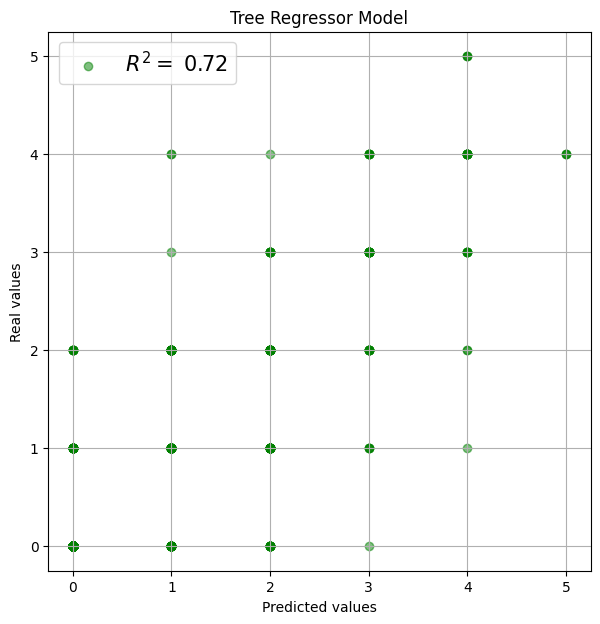

In [51]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vent_heating,9901.0,0.234522,0.702768,0.000000,0.00000,0.000000,0.00000,5.000000
Graz Temperature [2 m elevation corrected],9901.0,13.817292,9.027007,-4.438630,5.74137,14.151369,21.37137,34.121372
Graz Shortwave Radiation,9901.0,193.175033,254.035434,0.000000,0.00000,28.480000,345.32000,888.220000
Graz Direct Shortwave Radiation,9901.0,117.481007,167.269655,-8.570068,0.00000,7.892594,198.35951,603.423100
Graz Diffuse Shortwave Radiation,9901.0,75.694025,92.612724,0.000000,0.00000,13.930489,151.48965,300.795400
Graz Relative Humidity [2 m],9901.0,58.445814,14.090466,19.000000,48.00000,59.000000,68.00000,98.000000
is_schoolday,9901.0,0.513786,0.499835,0.000000,0.00000,1.000000,1.00000,1.000000
day,9901.0,15.985052,8.763006,1.000000,8.00000,16.000000,24.00000,31.000000
month,9901.0,6.539541,3.247560,1.000000,4.00000,7.000000,9.00000,12.000000
year,9901.0,2021.512877,0.499859,2021.000000,2021.00000,2022.000000,2022.00000,2022.000000


In [53]:
test_df = X_test
test_df['vent_heating_pred'] = DTRPred
test_df['vent_heating_real'] = y_test

In [54]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,vent_heating_pred,vent_heating_real
9859,27.291370,145.95999,79.33249,66.62750,45.0,0,29,7,20,0.0,0.0
5680,5.621370,222.50000,123.50700,98.99300,50.0,0,5,2,17,0.0,0.0
4767,9.411369,202.03000,111.50673,90.52327,61.0,0,29,12,16,1.0,2.0
9219,19.441370,0.00000,0.00000,0.00000,63.0,0,3,7,4,0.0,0.0
621,20.591370,0.00000,0.00000,0.00000,51.0,1,9,7,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5858,0.401370,0.00000,0.00000,0.00000,66.0,0,13,2,3,0.0,0.0
7442,3.701370,0.00000,0.00000,0.00000,73.0,1,20,4,3,0.0,0.0
2846,9.741369,332.86000,259.49188,73.36812,62.0,0,10,10,15,0.0,0.0
1468,23.391370,0.00000,0.00000,0.00000,65.0,0,14,8,5,0.0,0.0
